# Investigative analysis of The Movie Database (TMDb) dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
# Importing all packages and libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='intro'></a>
## Introduction

> This data set provided by Kaggle contains information about 10,000 movies collected from The Movie Database (TMDb), including popularity, revenue, budget and genres among others. The excercise will be taking into consideration a number of paramaters and will be going through the standard steps of the data analysis process - data wrangling, cleaning, exploring and finally drawing conclusions aided by visualizations to answer the questions posed below. 

## Questions

>1. What are the 10 most popular movies of all time?
>2. What is the average revenue and how is this trending for all the movies released all time?
>3. What is the average runtime and the distribution of runtimes for all movies?
>4. Which genres are most popular from year to year?
>5. Is there any correlation between the adjusted budget of a movie and the adjusted revenue data? If yes, what type?


<a id='wrangling'></a>
## Data Wrangling

>In the first part of the data analysis process we will be looking at the general properties of the dataset, such as total number of columns, data types, missing values etc. in order to have a clear idea about where data cleaning needs to be applied.

### General Properties

In [2]:
# Loading the data and printing out the first few rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Getting an overview and common aggregation values of the numeric columns in the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
#Checking the data types and if we have any null values for all the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Checking the total number of rows and columns of the dataset
df.shape

(10866, 21)

In [6]:
#Checking for any duplicated rows in the dataset
sum(df.duplicated())

1

In [7]:
#Checking which precise rows are duplicated in the dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


### Data Cleaning (Replace this with more specific notes!)

In [8]:
#Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [9]:
#Dropping columns that are not going to be used for answering the posed questions
df.drop(['id', 'imdb_id', 'budget', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count', 'vote_average'], axis =1, inplace=True)


In [10]:
#Checking if the columns in cause were dropped accordingly
df.head(1)

,popularity,revenue,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09


In [11]:
#Checking again for nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10865 non-null float64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 763.9+ KB


In [12]:
#Filling in null values for the genres column
df['genres'].fillna('No genre provided', inplace=True)

In [13]:
#Final check before saving the clean dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10865 non-null float64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 763.9+ KB


In [14]:
#Assigning the clean dataset 
df_clean = df.copy()

<a id='eda'></a>
## Exploratory Data Analysis

> The exploratory data analysis will be addressing each of the questions posed and will deliver statistical summaries accompanied by visualizations to provide a complete easy to comprehend results.


### 1. What are the 10 most popular movies off all time?

In [15]:
#Finding the top 10 movies in terms of popularity and applying descending sorting 
df_top10_popular_movies = df_clean.nlargest(10,'popularity')
print(df_top10_popular_movies)

      popularity     revenue                         original_title  runtime  \
0      32.985763  1513528810                         Jurassic World      124   
1      28.419936   378436354                     Mad Max: Fury Road      120   
629    24.949134   621752480                           Interstellar      169   
630    14.311205   773312399                Guardians of the Galaxy      121   
2      13.112507   295238201                              Insurgent      119   
631    12.971027   714766572    Captain America: The Winter Soldier      136   
1329   12.037933   775398007                              Star Wars      121   
632    11.422751    78739897                              John Wick      101   
3      11.173104  2068178225           Star Wars: The Force Awakens      136   
633    10.739009   752100229  The Hunger Games: Mockingjay - Part 1      123   

                                         genres  release_year    budget_adj  \
0     Action|Adventure|Science Fiction|T

In [16]:
df_top10_popular_movies.original_title

0                              Jurassic World
1                          Mad Max: Fury Road
629                              Interstellar
630                   Guardians of the Galaxy
2                                   Insurgent
631       Captain America: The Winter Soldier
1329                                Star Wars
632                                 John Wick
3                Star Wars: The Force Awakens
633     The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object

[Text(0, 0.5, 'Movie title'), Text(0.5, 0, 'Popularity Rating')]

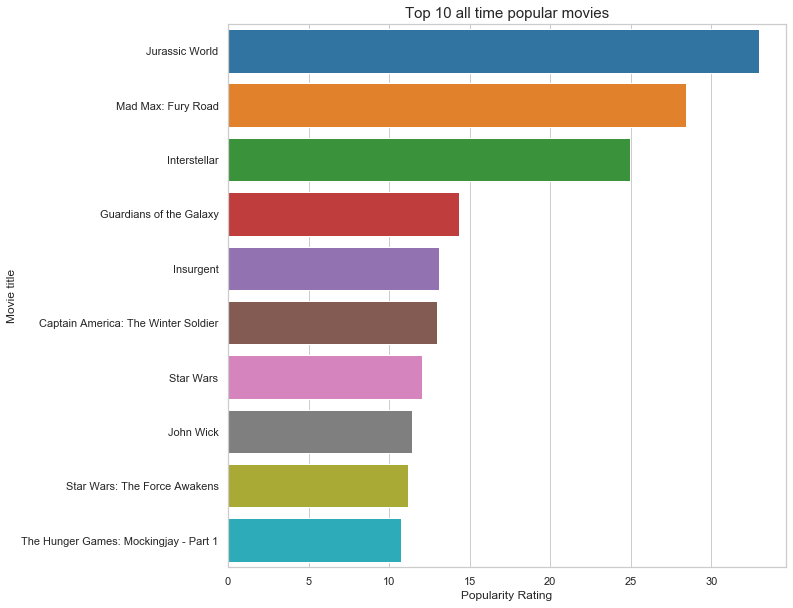

In [17]:
#Plotting visual for the top 10 movies in terms of popularity
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.set_context('notebook')
ax=sns.barplot(x='popularity', y='original_title', data=df_top10_popular_movies,orient='h')
ax.axes.set_title('Top 10 all time popular movies', fontsize=15)
ax.set(xlabel='Popularity Rating', ylabel='Movie title')


### 2. What is the average revenue and how is this trending for all the movies released all time?

In [18]:
#Grouping revenue values by release year
df_revenue_by_year = df_clean.groupby(['release_year'])['revenue'].mean().reset_index()

In [19]:
#Finding the average revenue for all released movies (casting as int to get a rounded value)
df_revenue_by_year.mean().astype(int)

release_year        1987
revenue         30753915
dtype: int32

In [20]:
#Inspecting if the grouping operation succeeded 
df_revenue_by_year.head()

,release_year,revenue
0,1960,4.531406e+06
1,1961,1.089420e+07
2,1962,6.736870e+06
3,1963,5.511911e+06
4,1964,8.118614e+06


Text(0, 0.5, 'Revenue')

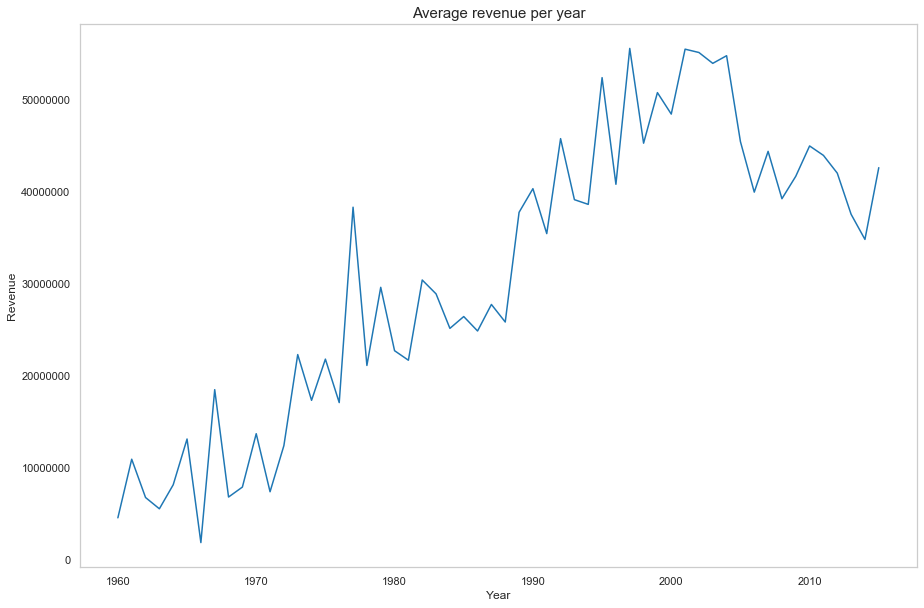

In [21]:
#Plotting the average revenue per year as a line graph to obtain the average revenue trend
plt.figure(figsize=(15,10))
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid(linestyle='')
plt.plot('release_year','revenue', data = df_revenue_by_year)
plt.title('Average revenue per year', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Revenue')


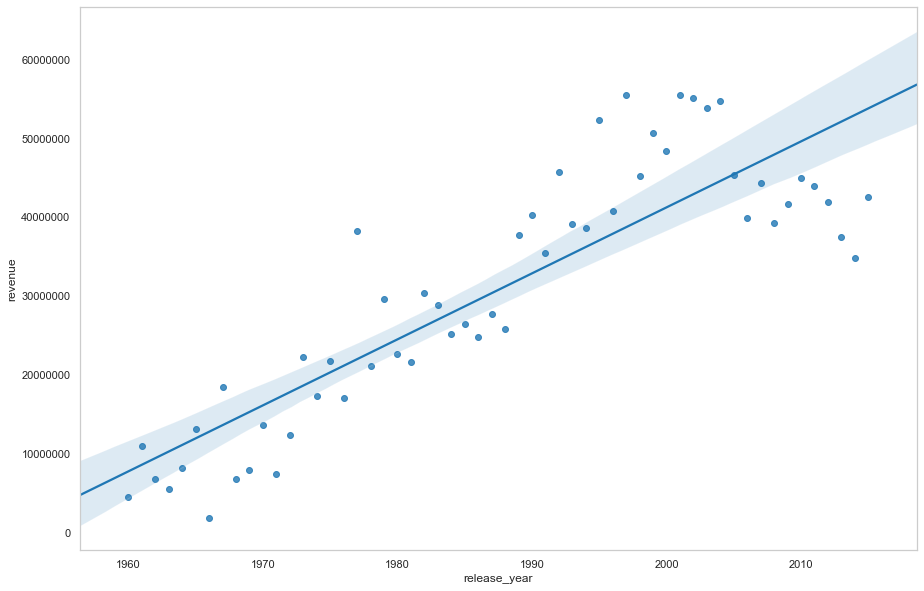

In [22]:
#Plotting a separate graph to show the linear trend
plt.figure(figsize=(15,10))
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid(linestyle='')
sns.regplot(x='release_year',y='revenue', data = df_revenue_by_year)

### 3. What is the average runtime and the distribution of runtimes for all movies?

In [23]:
#Finding the average runtime of all movies
df_clean['runtime'].mean()

102.07179015186378

(-45.0, 300)

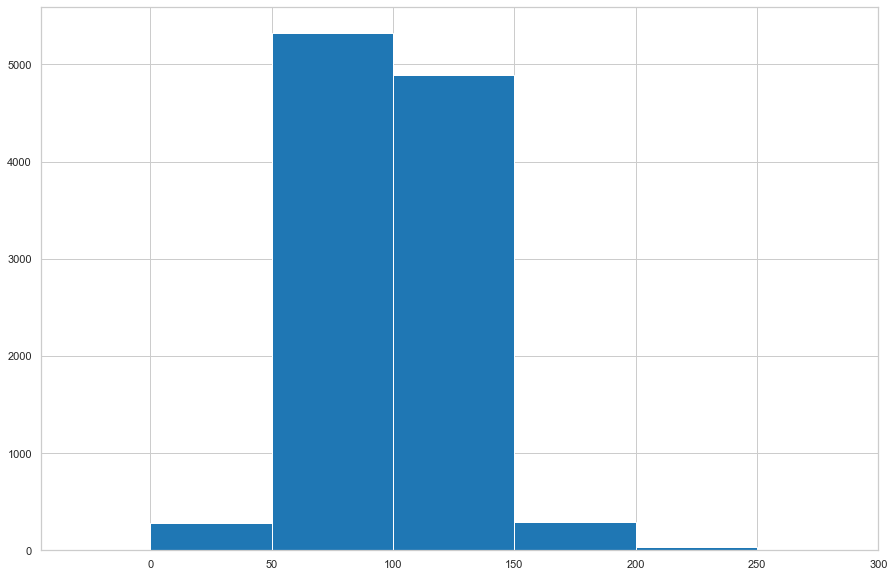

In [24]:
#Plotting the distribution of runtimes
plt.figure(figsize=(15,10))
plt.ticklabel_format(useOffset=False, style='plain')
plt.hist('runtime', bins=18, data = df_clean)
plt.xlim(right=300)

### 4. What are the genres with the biggest number of movies released year to year?

In [25]:
#Creating a new dataframe, splitting the genres column values into multiple rows and then combining them into one single column
df_test = pd.DataFrame(df_clean.genres.str.split('|').tolist(), index=df_clean.release_year).stack()

In [26]:
#Removing the secondary index created by the first step
df_test = df_test.reset_index([0, 'release_year'])

In [27]:
#Setting new column names for the newly created data frame
df_test.columns = ['release_year','genres']

In [28]:
#As we have movies released from 1966 onwards, we have decided to show genre popularity trends for the last 5 years with a new dataframe created specifically for this
df_last5years = df_test.query('release_year >=2010')

In [29]:
#Grouping data by release years and genre and appending the newly generated column to a new data frame
df_plot = df_last5years.groupby(['release_year','genres'])['genres'].count().to_frame(name='count').reset_index()

In [30]:
#Checking if the new data frame contains all the columns and values needed
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
release_year    122 non-null int64
genres          122 non-null object
count           122 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


In [31]:
#Checking if grouping was done correctly
df_plot.head(50)

,release_year,genres,count
0,2010,Action,107
1,2010,Adventure,59
2,2010,Animation,50
3,2010,Comedy,169
4,2010,Crime,50
5,2010,Documentary,35
6,2010,Drama,210
7,2010,Family,55
8,2010,Fantasy,44
9,2010,Foreign,13


Text(32.88741979166667, 0.5, 'Count')

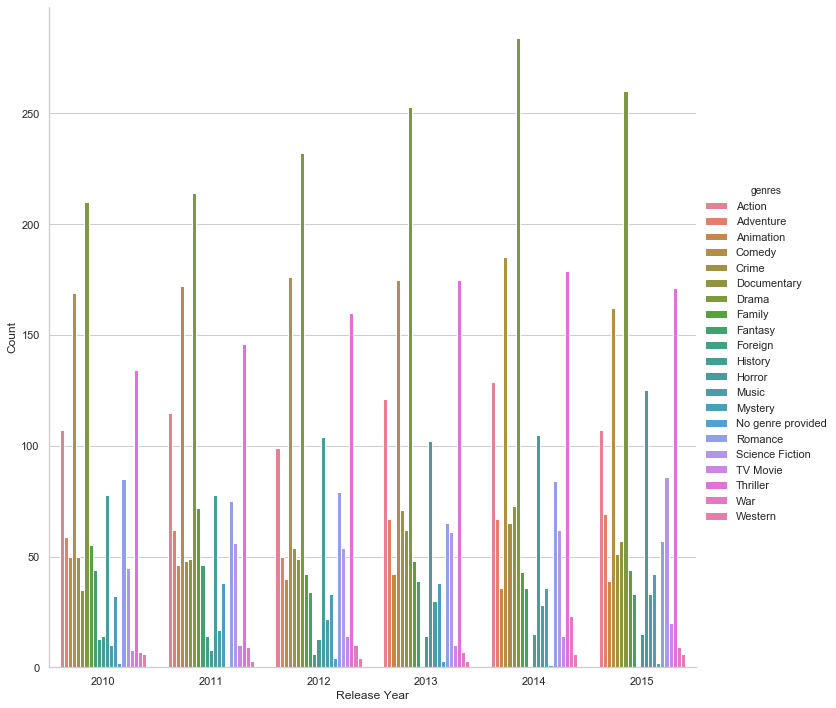

In [32]:
#Plotting the data for the 2010 - 2015 years range
sns.set(style='whitegrid')
sns.catplot(x='release_year', y='count', hue ='genres', data=df_plot, height=10, kind='bar', palette='husl')
plt.xlabel('Release Year')
plt.ylabel('Count')

Text(29.107993576388893, 0.5, 'Count')

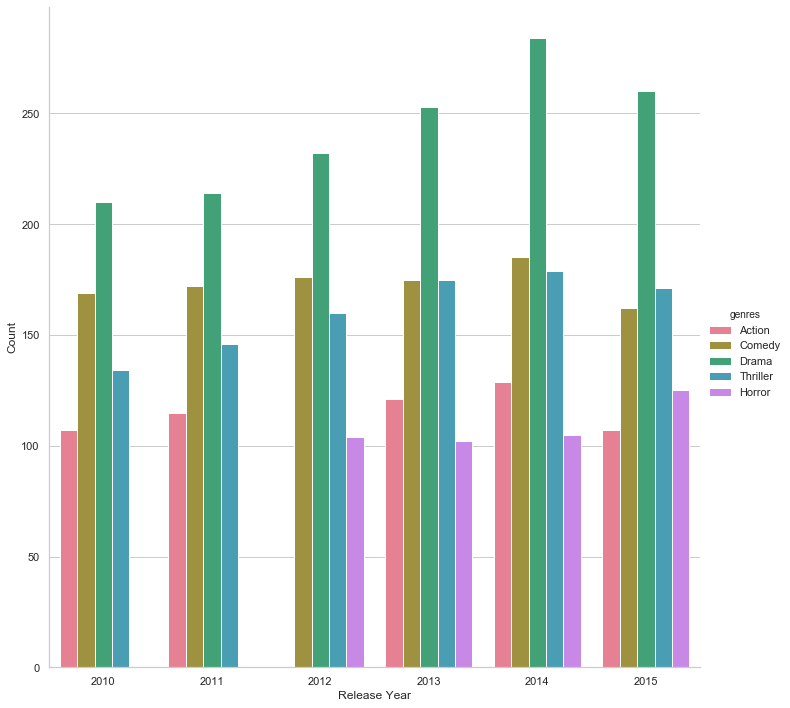

In [33]:
#The visualization above may be a bit overloaded and hard to read, so below we have plotted the genres that had over 100 releases per year
sns.set(style='whitegrid')
sns.catplot(x='release_year', y='count', hue ='genres', data=df_plot.query('count >100'), height=10, kind='bar', palette='husl')
plt.xlabel('Release Year')
plt.ylabel('Count')

### 5. Is there any correlation between the adjusted budget of a movie and the adjusted revenue data? If yes, what type?

In [34]:
#Finding out the Pearson R correlation coefficient for the values in all columns
df_clean.corr(method='pearson')

,popularity,revenue,runtime,release_year,budget_adj,revenue_adj
popularity,1.000000,0.663360,0.139032,0.089806,0.513555,0.609085
revenue,0.663360,1.000000,0.162830,0.057070,0.706446,0.919109
runtime,0.139032,0.162830,1.000000,-0.117187,0.221127,0.175668
release_year,0.089806,0.057070,-0.117187,1.000000,0.016771,-0.066236
budget_adj,0.513555,0.706446,0.221127,0.016771,1.000000,0.646627
revenue_adj,0.609085,0.919109,0.175668,-0.066236,0.646627,1.000000


Text(0, 0.5, 'Adjusted Revenue')

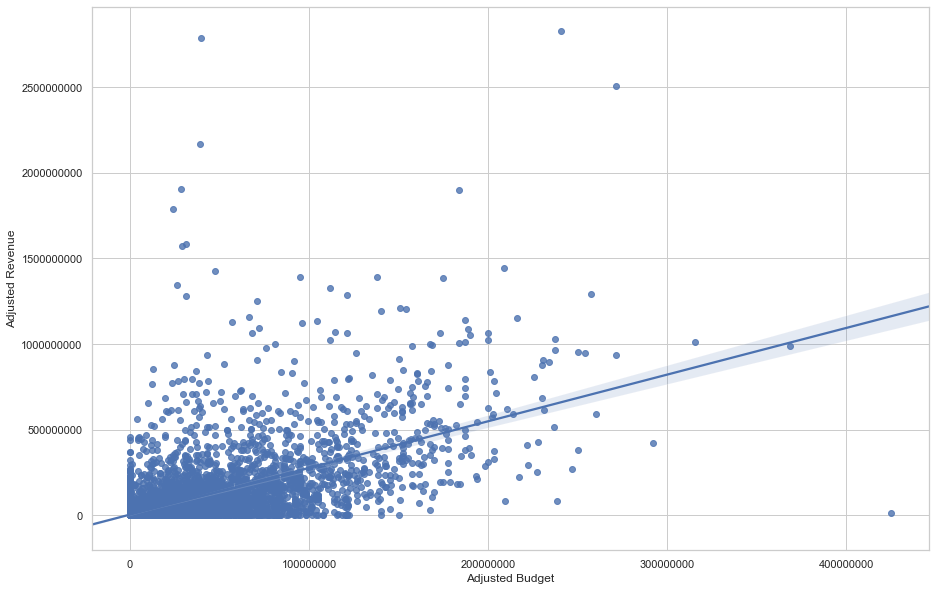

In [35]:
#Creating a scatter plot to better visualize the correlation between adjusted budget and adjusted revenue values
plt.figure(figsize=(15,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.regplot(x=df_clean['budget_adj'], y=df_clean['revenue_adj'], data=df_clean)
plt.xlabel('Adjusted Budget')
plt.ylabel('Adjusted Revenue')

<a id='conclusions'></a>
## Conclusions

>As per the analysis process presented above, we have managed to extract the information we needed to succesfully answer the questions posed at the start of the exercise. Visualizations were also added to support the conclusions, with the part below summarizing the needed answers.

### 1. What are the 10 most popular movies off all time?

>1. Jurassic World
>2. Mad Max: Fury Road 
>3. Interstellar
>4. Guardians of the Galaxy
>5. Insurgent
>6. Captain America: The Winter Soldier
>7. Star Wars
>8. John Wick
>9. Star Wars: The Force Awakens
>10. The Hunger Games: Mockingjay - Part 1

### 2. What is the average revenue and how is this trending for all the movies released all time?

>1. On average, a movie included in the dataset made 30,753,915 dollars in revenue
>2. As per the visualizations included we can observe that the average revenue value has an overall positive trend, with only the 2000-2010 decade showing a decrease

### 3. What is the average runtime and the distribution of runtimes for all movies?

>1. On average, the runtime of a movie included in the data set is 102 minutes
>2. As per the visualization included we can observe that the vast majority of the movies have a runtime between 50 and 150 minutes

### 4. What are the genres with the biggest number of movies released year to year?

>Here we have chosen to look at the last 5 years - plotting visuals for all the years in the dataset would not have been feasible due to the sheer amount of genres and release years that would have had to be included. For the 2010 - 2015 we can clearly see that the Drama (over 200 releases each year), Comedy (over 150 releases each year) and Thriller (over 125 releases each year) are the genres with the biggest number of releases per year.

### 5. Is there any correlation between the adjusted budget of a movie and the adjusted revenue data? If yes, what type?

>As per the table and visualization included, we can observe that a moderate positive correlation exists between the adjusted budget and adjusted revenue values in the data set, with the Pearson r coeffiecient being equal to 0.65. 

## Limitations

>Apart from filling in a small number of values for the Genres column and dropping unncessary columns, the data that we have worked with did not need extensive manipulation before going through the analysis process.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Tmdb_Movies_data_analysis.ipynb'])

0